In [1]:
# import numpy as np

# # !/usr/bin/env python3
# # -*- coding: utf-8 -*-
# """
# Created on 20181219

# @author: zhangji

# Trajection of a ellipse, Jeffery equation. 
# """

# %pylab inline
# pylab.rcParams['figure.figsize'] = (25, 11)
# fontsize = 40

# import numpy as np
# import scipy as sp
# from scipy.optimize import leastsq, curve_fit
# from scipy import interpolate
# from scipy.interpolate import interp1d
# from scipy.io import loadmat, savemat
# # import scipy.misc

# import matplotlib
# from matplotlib import pyplot as plt
# from matplotlib import animation, rc
# import matplotlib.ticker as mtick
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
# from mpl_toolkits.mplot3d import Axes3D, axes3d

# from sympy import symbols, simplify, series, exp
# from sympy.matrices import Matrix
# from sympy.solvers import solve

# from IPython.display import display, HTML
# from tqdm import tqdm_notebook as tqdm
# import pandas as pd
# import re
# from scanf import scanf
# import os
# import glob

# from codeStore import support_fun as spf
# from src.support_class import *
# from src import stokes_flow as sf

# rc('animation', html='html5')
# PWD = os.getcwd()
# font = {'size': 20}
# matplotlib.rc('font', **font)
# np.set_printoptions(linewidth=90, precision=5)

%load_ext autoreload
%autoreload 2

from tqdm import tqdm_notebook
import os
import glob
import natsort 
import numpy as np
import scipy as sp
from scipy.optimize import leastsq, curve_fit
from scipy import interpolate, integrate
from scipy import spatial, signal
# from scipy.interpolate import interp1d
from scipy.io import loadmat, savemat
# import scipy.misc
from IPython.display import display, HTML
import pandas as pd
import pickle
import re
from scanf import scanf

import matplotlib
# matplotlib.use('agg')
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from matplotlib import animation, rc
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.mplot3d import Axes3D, axes3d
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib import cm

from tqdm.notebook import tqdm as tqdm_notebook
from tqdm import tqdm
from time import time
from src.support_class import *
from src import jeffery_model as jm
from codeStore import support_fun as spf
from codeStore import support_fun_table as spf_tb

# %matplotlib notebook
%matplotlib inline
rc('animation', html='html5')
fontsize = 40
PWD = os.getcwd()

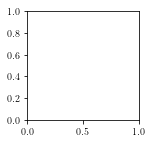

In [2]:
fig = plt.figure(figsize=(2, 2))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(1, 1, 1)

In [3]:
job_dir = 'hlxC01_baseFlow_psi_rada'

t_headle = '(.*?).pickle'

In [4]:
n_load = 10000
rand_mode=False

t_dir = os.path.join(PWD, job_dir)
_ = spf_tb.load_rand_data_pickle_dir_v2(t_dir, t_headle, n_load=n_load, rand_mode=rand_mode)
ini_theta_list, ini_phi_list, ini_psi_list, std_eta_list, psi_max_phi_list, \
theta_autocorrelate_fre_list, phi_autocorrelate_fre_list, psi_autocorrelate_fre_list, \
eta_autocorrelate_fre_list, dx_list, dy_list, dz_list, pickle_path_list = _

In [5]:
t_name = os.path.join(os.getcwd(), 'ecoC01B05_phase_Peclet', '%s.pickle' % job_dir)
with open(t_name, 'wb') as handle:    
    pickle.dump(_, handle, protocol=pickle.HIGHEST_PROTOCOL)
print('save to %s' % t_name)

save to /home/zhangji/stokes_flow_master/head_Force/do_calculate_table/ecoC01B05_phase_Peclet/hlxC01_baseFlow_psi_rada.pickle


3985

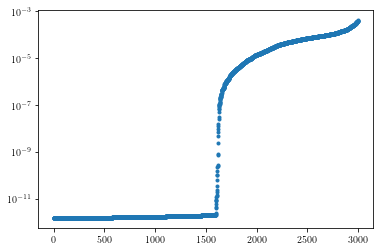

In [6]:
# np.abs(dz_list).max()
# np.sort(dz_list)[100:300]
plt.semilogy(np.sort(np.abs(dz_list))[-3000:], '.')
np.argmax(np.abs(dz_list))

[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22]
 [  43    4   67   40    3    6   41  374  114  379   51 8601    4  104
    86   47   17    1    4    3    9    1    1]]

0 43 0.4819261548220683 0.24372834852373104
1 4 0.5137809445065673 0.23753396286846368
2 67 0.5132648363276079 0.2075993149048111
3 40 0.4999195978569748 0.09761537656014521
4 3 0.4957494711368598 0.10967314748309591
5 6 0.5063363199453831 0.17463889518253542
6 41 0.5116750032535665 0.1872132176362939
7 374 0.5002656162966539 0.16089838218461883
8 114 0.49544501003596897 0.11763833850596367
9 379 0.49993322786595024 0.10142606631543263
10 51 0.49644991664957366 0.05493407926479225
11 8601 0.5000005019330674 7.975860655084375e-07
12 4 0.7391018221071997 0.013059015844536092
13 104 0.485023703065889 0.037897183243771865
14 86 0.4992319132810898 0.051168505285390374
15 47 0.5396259352614662 0.058692971731078576
16 17 0.6890364795749357 0.0616551382295

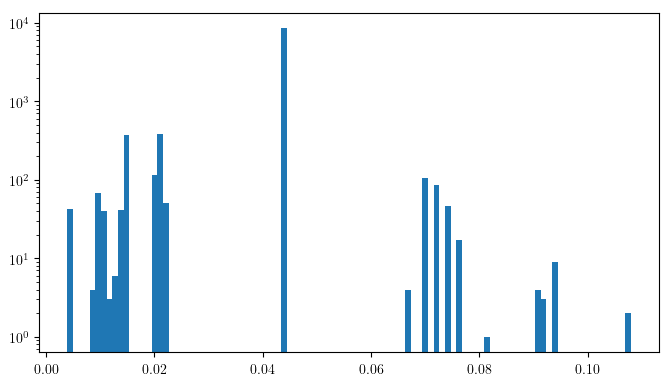

In [7]:
n_hist = 100
figsize = np.array((16, 9)) * 0.5
dpi = 100
# use_autocorrelate_fre_list = theta_autocorrelate_fre_list
# use_autocorrelate_fre_list = phi_autocorrelate_fre_list
use_autocorrelate_fre_list = eta_autocorrelate_fre_list

tmax_fre_list = np.hstack([t1[0, 0] for t1 in use_autocorrelate_fre_list])
# tmax_fre_list = tmax_fre_list[tmax_fre_list < 0.04]
fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi)
t1 = axi.hist(tmax_fre_list, n_hist)
axi.set_yscale('log')

bin_edges = np.histogram_bin_edges(tmax_fre_list, n_hist)
case_idx0 = np.digitize(tmax_fre_list, bin_edges)
case_idx = np.ones_like(case_idx0) * -1
for i1, i0 in enumerate(np.unique(case_idx0)):
    tidx = np.isclose(case_idx0, i0)
    case_idx[tidx] = i1
assert np.all(case_idx >= 0)
print(np.vstack((np.unique(case_idx), np.bincount(case_idx))))
print()

for use_case, n_case in zip(np.unique(case_idx), np.bincount(case_idx)):
    tidx = np.isclose(case_idx, use_case)
    # np.mean(psi_max_phi_list[tidx][psi_max_phi_list[tidx] > np.pi])
    print(use_case, n_case, np.mean(std_eta_list[tidx][:, 0] / np.pi), (std_eta_list[tidx][:, 1] / np.pi).max())

/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


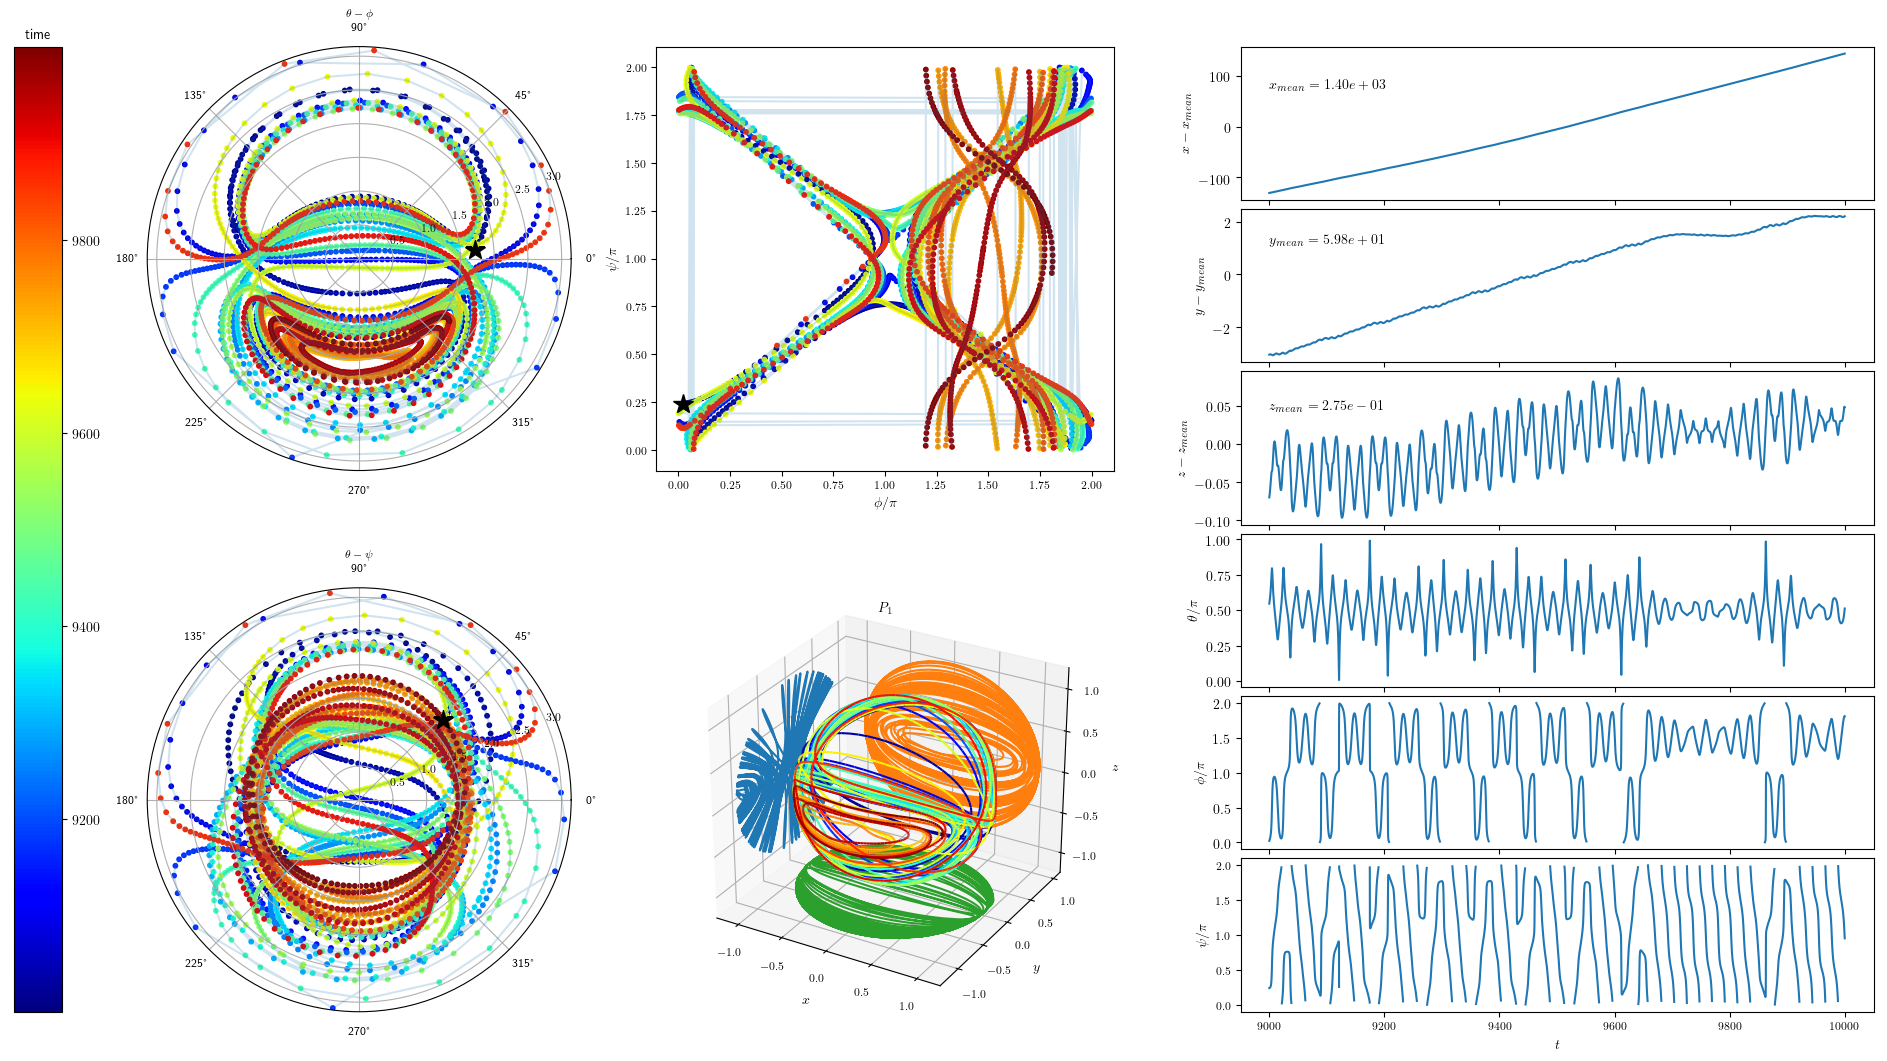

In [8]:
for use_idx in np.unique(case_idx)[:1]:
    tidx = np.isclose(case_idx, use_idx)
    tpath = pickle_path_list[tidx][0]
    with open(tpath, 'rb') as handle:
        tpick = pickle.load(handle)
    Table_t = tpick['Table_t']
    Table_dt = tpick['Table_dt']
    Table_X = tpick['Table_X']
    Table_P = tpick['Table_P']
    Table_P2 = tpick['Table_P2']
    Table_theta = tpick['Table_theta']
    Table_phi = tpick['Table_phi']
    Table_psi = tpick['Table_psi']
    Table_eta = tpick['Table_eta']
    idx = Table_t > 9000
    spf_tb.show_table_result_v2(Table_t[idx], Table_dt[idx], Table_X[idx], Table_P[idx], Table_P2[idx], 
                                Table_theta[idx], Table_phi[idx], Table_psi[idx], Table_eta[idx])

/home/zhangji/stokes_flow_master/head_Force/do_calculate_table/hlxC01_baseFlow_psi_rada/th0.955_ph4.933_ps6.014_D20200517_T020954.pickle
/home/zhangji/stokes_flow_master/head_Force/do_calculate_table/hlxC01_baseFlow_psi_rada/th0.491_ph4.376_ps3.573_D20200516_T233808.pickle


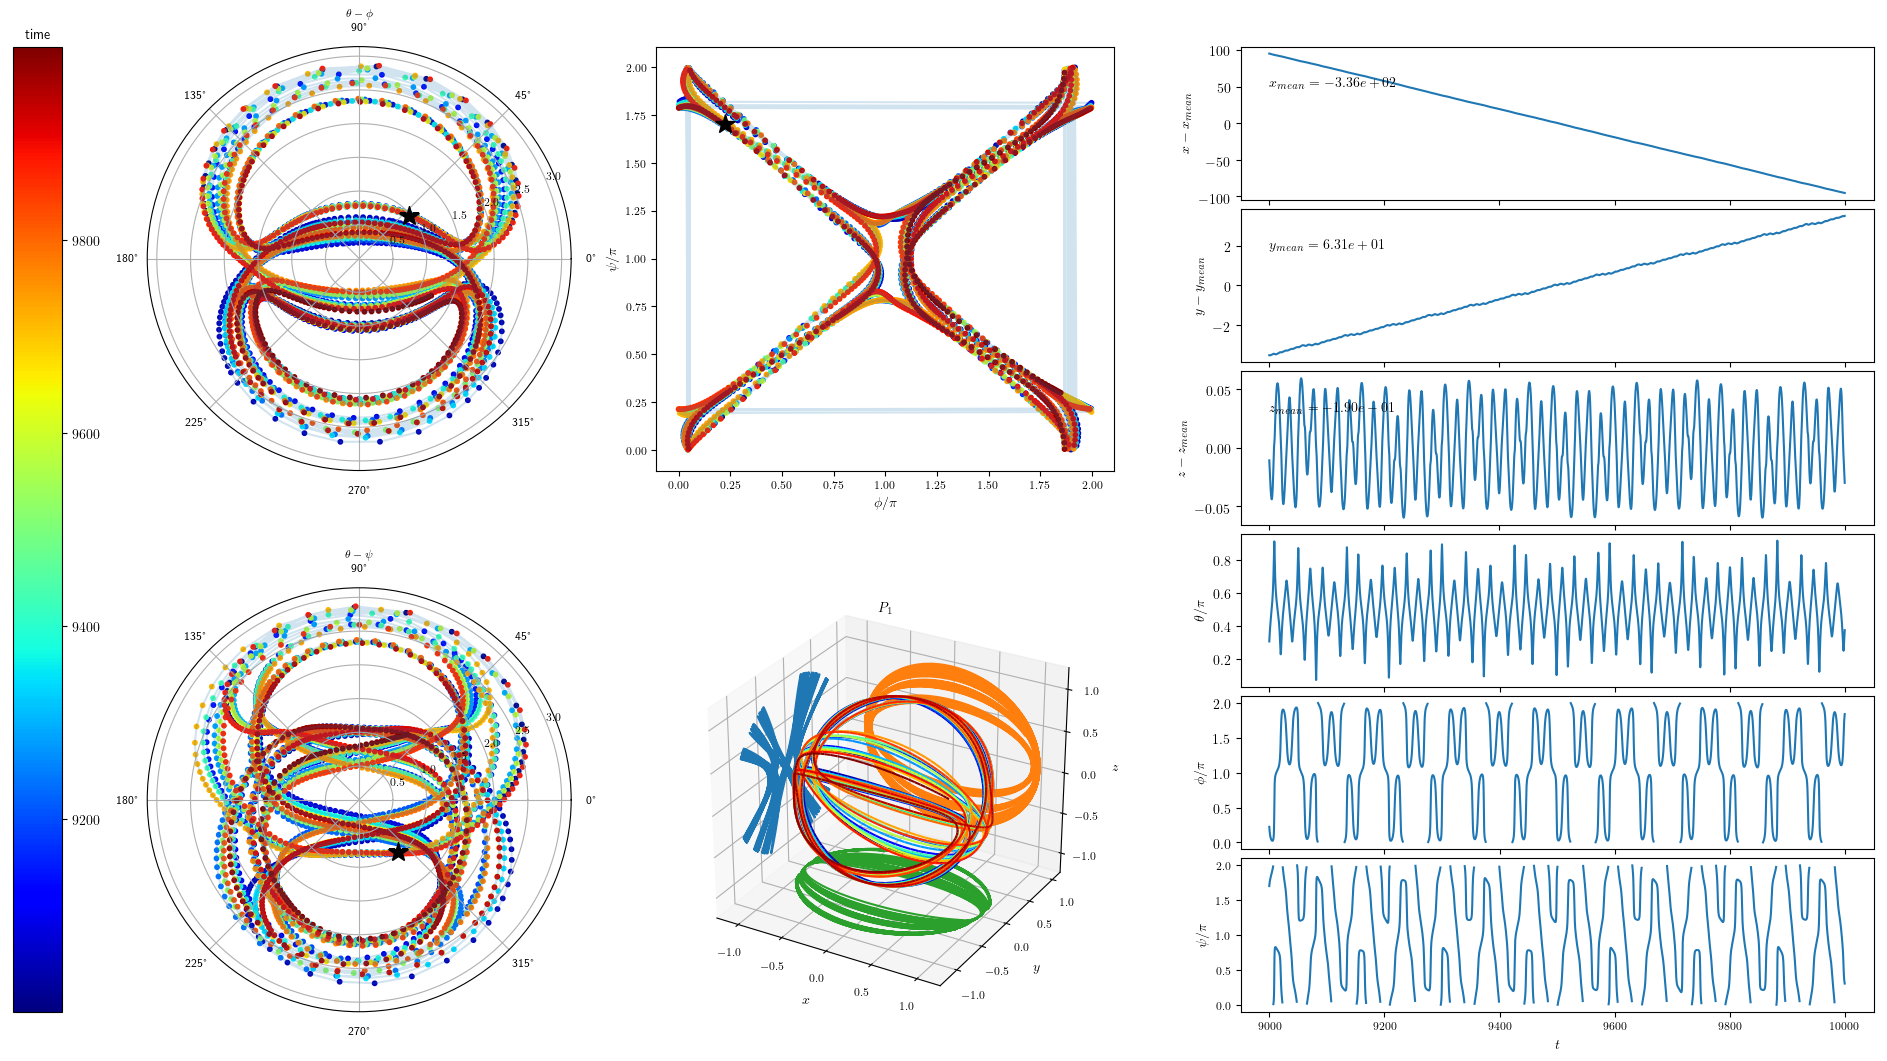

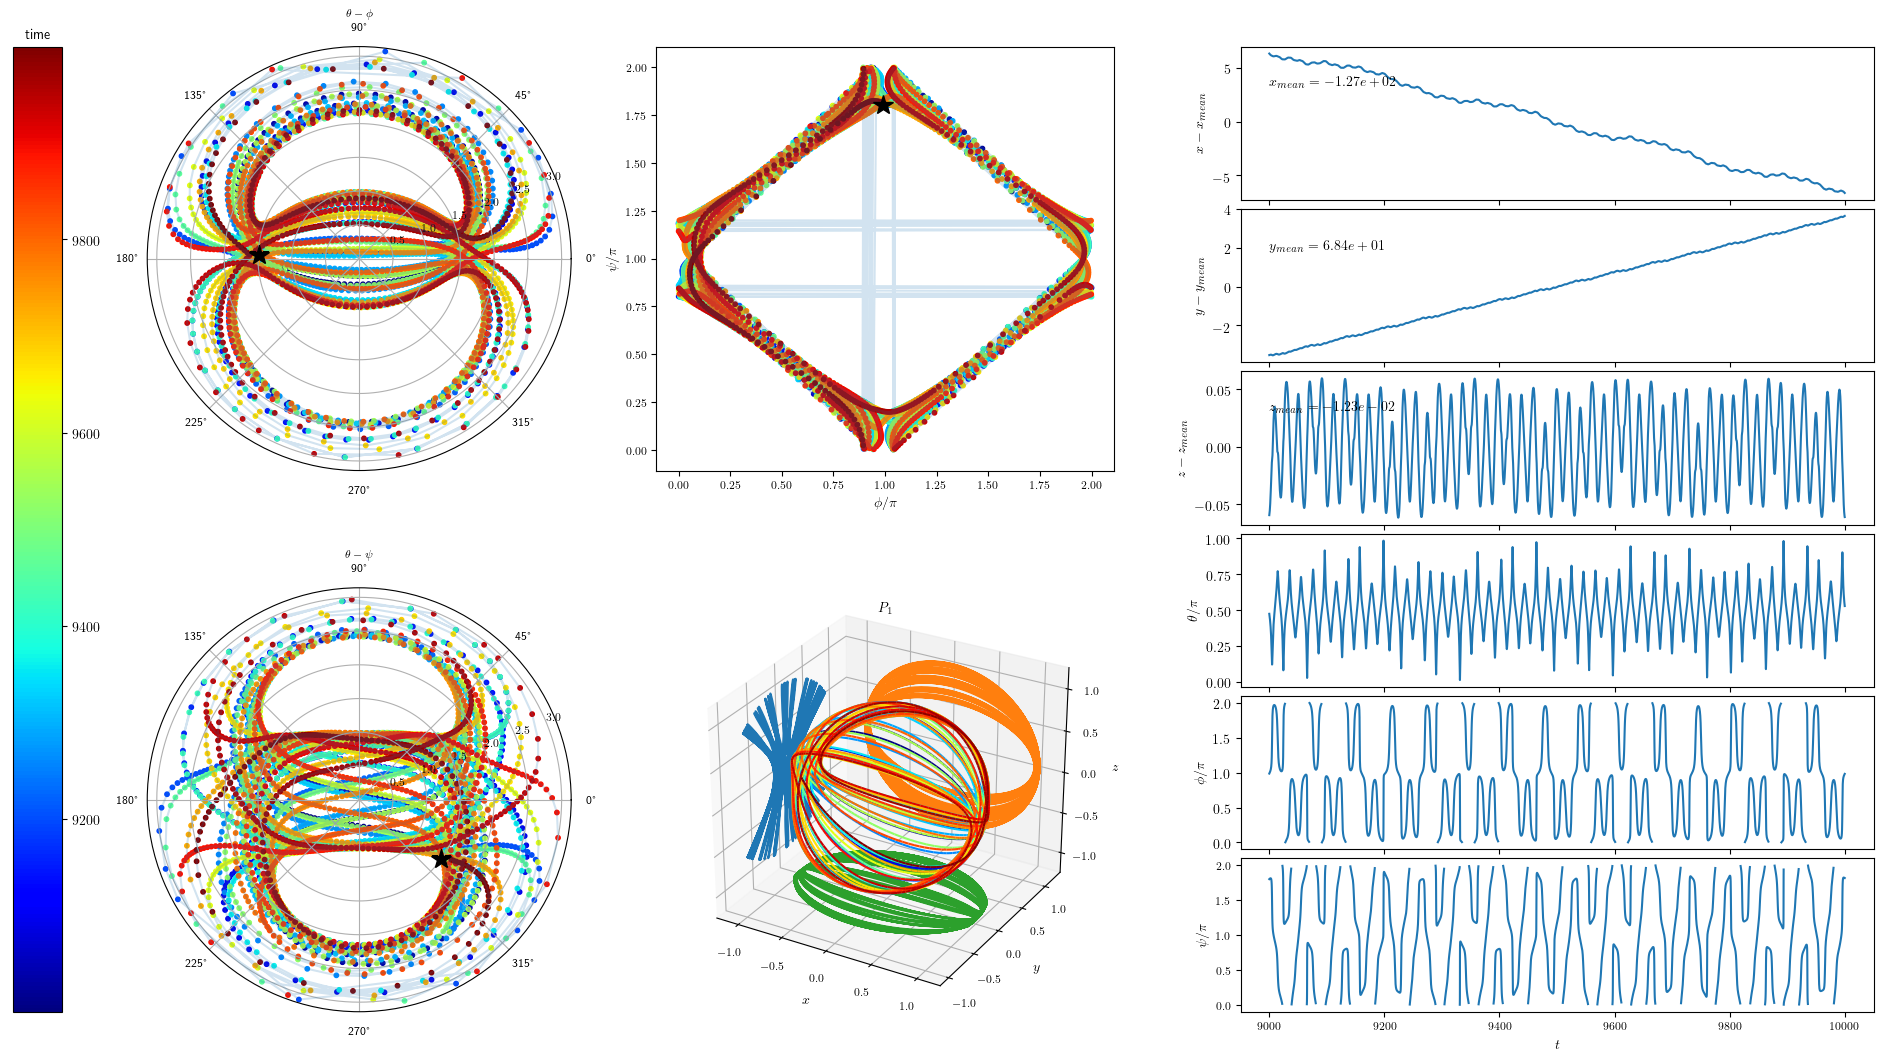

In [9]:
# tidx = np.isclose(case_idx, 2)
# tpath = pickle_path_list[tidx][0]
for i0 in range(100, 102):
    tpath = pickle_path_list[np.flipud(np.argsort(np.abs(dz_list)))[i0]]
    print(tpath)

    with open(tpath, 'rb') as handle:
        tpick = pickle.load(handle)
    Table_t = tpick['Table_t']
    Table_dt = tpick['Table_dt']
    Table_X = tpick['Table_X']
    Table_P = tpick['Table_P']
    Table_P2 = tpick['Table_P2']
    Table_theta = tpick['Table_theta']
    Table_phi = tpick['Table_phi']
    Table_psi = tpick['Table_psi']
    Table_eta = tpick['Table_eta']
    idx = Table_t > 9000
    spf_tb.show_table_result_v2(Table_t[idx], Table_dt[idx], Table_X[idx], Table_P[idx], Table_P2[idx], 
                                Table_theta[idx], Table_phi[idx], Table_psi[idx], Table_eta[idx])

(array([ 0.,  0.,  0.,  0.,  0., 40.,  0.,  0.,  0.,  0.]), array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]), <a list of 10 Patch objects>)
(array([30.,  8.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]), array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]), <a list of 10 Patch objects>)
(array([ 0.,  0.,  0.,  0.,  0., 40.,  0.,  0.,  0.,  0.]), array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]), <a list of 10 Patch objects>)
(array([ 0.,  0.,  0.,  0.,  0., 40.,  0.,  0.,  0.,  0.]), array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]), <a list of 10 Patch objects>)
40, 0.0102, 0.0100, 0.0102±3.22e-05
40, 2.3638e-06, -1.1104e-06, 1.4408e-07±5.94e-07
0.4999±0.0976, 0.000000


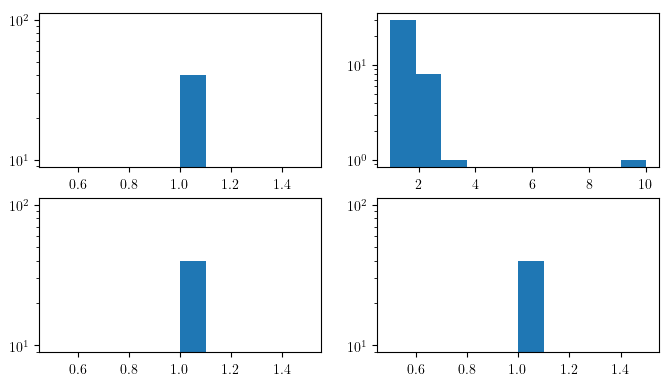

In [10]:
# tidx = np.isclose(case_idx, 0)
# tidx = np.isclose(case_idx, 2)
tidx = np.isclose(case_idx, 3)


figsize = np.array((16, 9)) * 0.5
dpi = 100
fig, axs = plt.subplots(2, 2, figsize=figsize, dpi=dpi)
for axi, use_autocorrelate_fre_list in zip(axs.ravel(), (theta_autocorrelate_fre_list, phi_autocorrelate_fre_list, 
                                                         psi_autocorrelate_fre_list, eta_autocorrelate_fre_list)):
    t1 = use_autocorrelate_fre_list[tidx][:, 0]
    t2 = use_autocorrelate_fre_list[tidx][:, 1][t1[:, 0] / t1[:, 1] > 1]
    print(axi.hist(t1[:, 0] / t1[:, 1], 10, log=True, ))
# print(plt.hist(dy_list[tidx], 10, log=True, ))
print('%d, %.4f, %.4f, %.4f±%.2e' % (tidx.sum(), dy_list[tidx].max(), dy_list[tidx].min(), 
                                      dy_list[tidx].mean(), dy_list[tidx].std()))
print('%d, %.4e, %.4e, %.4e±%.2e' % (tidx.sum(), dz_list[tidx].max(), dz_list[tidx].min(), 
                                      dz_list[tidx].mean(), dz_list[tidx].std()))
if t2.size > 0:
    tpct = (t2[:, 1] / t2[:, 0]).max()
else:
    tpct = 0
print('%.4f±%.4f, %f' % (np.mean(std_eta_list[tidx][:, 0] / np.pi), (std_eta_list[tidx][:, 1] / np.pi).max(), tpct))

/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_base.py:3507: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  self.set_ylim(upper, lower, auto=None)


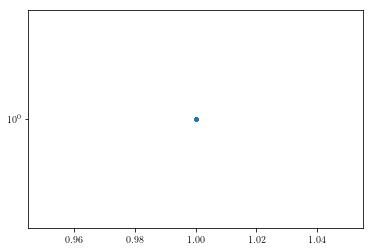

In [11]:
t1 = use_autocorrelate_fre_list[tidx][:, 0]
t2 = use_autocorrelate_fre_list[tidx][:, 1]
plt.semilogy(t1[:, 0] / t1[:, 1], t2[:, 1] / t2[:, 0], '.')

(array([30.,  8.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]), array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]), <a list of 10 Patch objects>)
40, 0.0102, 0.0100, 0.0102±3.22e-05
0.4999±0.0976, 0.556096


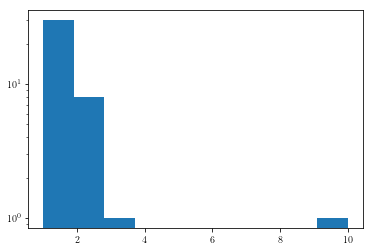

In [12]:
use_autocorrelate_fre_list = phi_autocorrelate_fre_list
# use_autocorrelate_fre_list = eta_autocorrelate_fre_list
# tidx = np.isclose(case_idx, 2)
# tidx = np.isclose(case_idx, 0)
tidx = np.isclose(case_idx, 3)

t1 = use_autocorrelate_fre_list[tidx][:, 0]
t2 = use_autocorrelate_fre_list[tidx][:, 1][t1[:, 0] / t1[:, 1] > 1]
print(plt.hist(t1[:, 0] / t1[:, 1], 10, log=True, ))
print('%d, %.4f, %.4f, %.4f±%.2e' % (tidx.sum(), dy_list[tidx].max(), dy_list[tidx].min(), 
                                      dy_list[tidx].mean(), dy_list[tidx].std()))
if t2.size > 0:
    tpct = (t2[:, 1] / t2[:, 0]).max()
else:
    tpct = 0
print('%.4f±%.4f, %f' % (np.mean(std_eta_list[tidx][:, 0] / np.pi), (std_eta_list[tidx][:, 1] / np.pi).max(), tpct))

(array([1., 0., 0., 0., 0., 0., 1., 0., 0., 4.]),
 array([0.48299206, 0.4860859 , 0.48917973, 0.49227357, 0.4953674 ,
        0.49846124, 0.50155507, 0.50464891, 0.50774274, 0.51083658,
        0.51393041]),
 <a list of 10 Patch objects>)

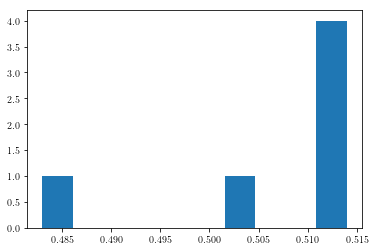

In [13]:
use_case = 5
tidx = np.isclose(case_idx, use_case)
plt.hist(std_eta_list[tidx][:, 0] / np.pi)

In [14]:
dy_list.max()

0.010199502585915714

In [15]:
t1 = psi_autocorrelate_fre_list[std_eta_list[:, 0] > np.pi * 0.8][:, 0]
t2 = psi_autocorrelate_fre_list[std_eta_list[:, 0] > np.pi * 0.8][:, 1]
t1

array([[0.048988  , 0.048988  ],
       [0.04677088, 0.04677088],
       [0.04440107, 0.04440107],
       [0.04676618, 0.04676618],
       [0.04680849, 0.04680849],
       [0.04676093, 0.04676093],
       [0.04807176, 0.04807176],
       [0.04808343, 0.04808343],
       [0.04678529, 0.04678529],
       [0.04676833, 0.04676833],
       [0.04897713, 0.04897713],
       [0.04898215, 0.04898215],
       [0.04898354, 0.04898354],
       [0.04677392, 0.04677392],
       [0.04899469, 0.04899469],
       [0.0455791 , 0.0455791 ],
       [0.04677563, 0.04677563],
       [0.04441978, 0.04441978],
       [0.04896739, 0.04896739],
       [0.04680742, 0.04680742],
       [0.04679995, 0.04679995],
       [0.04436945, 0.04436945],
       [0.04556259, 0.04556259],
       [0.0467612 , 0.0467612 ],
       [0.04899544, 0.04899544],
       [0.04560664, 0.04560664],
       [0.04896848, 0.04896848],
       [0.04901125, 0.04901125],
       [0.04806265, 0.04806265],
       [0.04897793, 0.04897793],
       [0.

## compare with marcos 2009

Text(0, 0.5, '$u_2$')

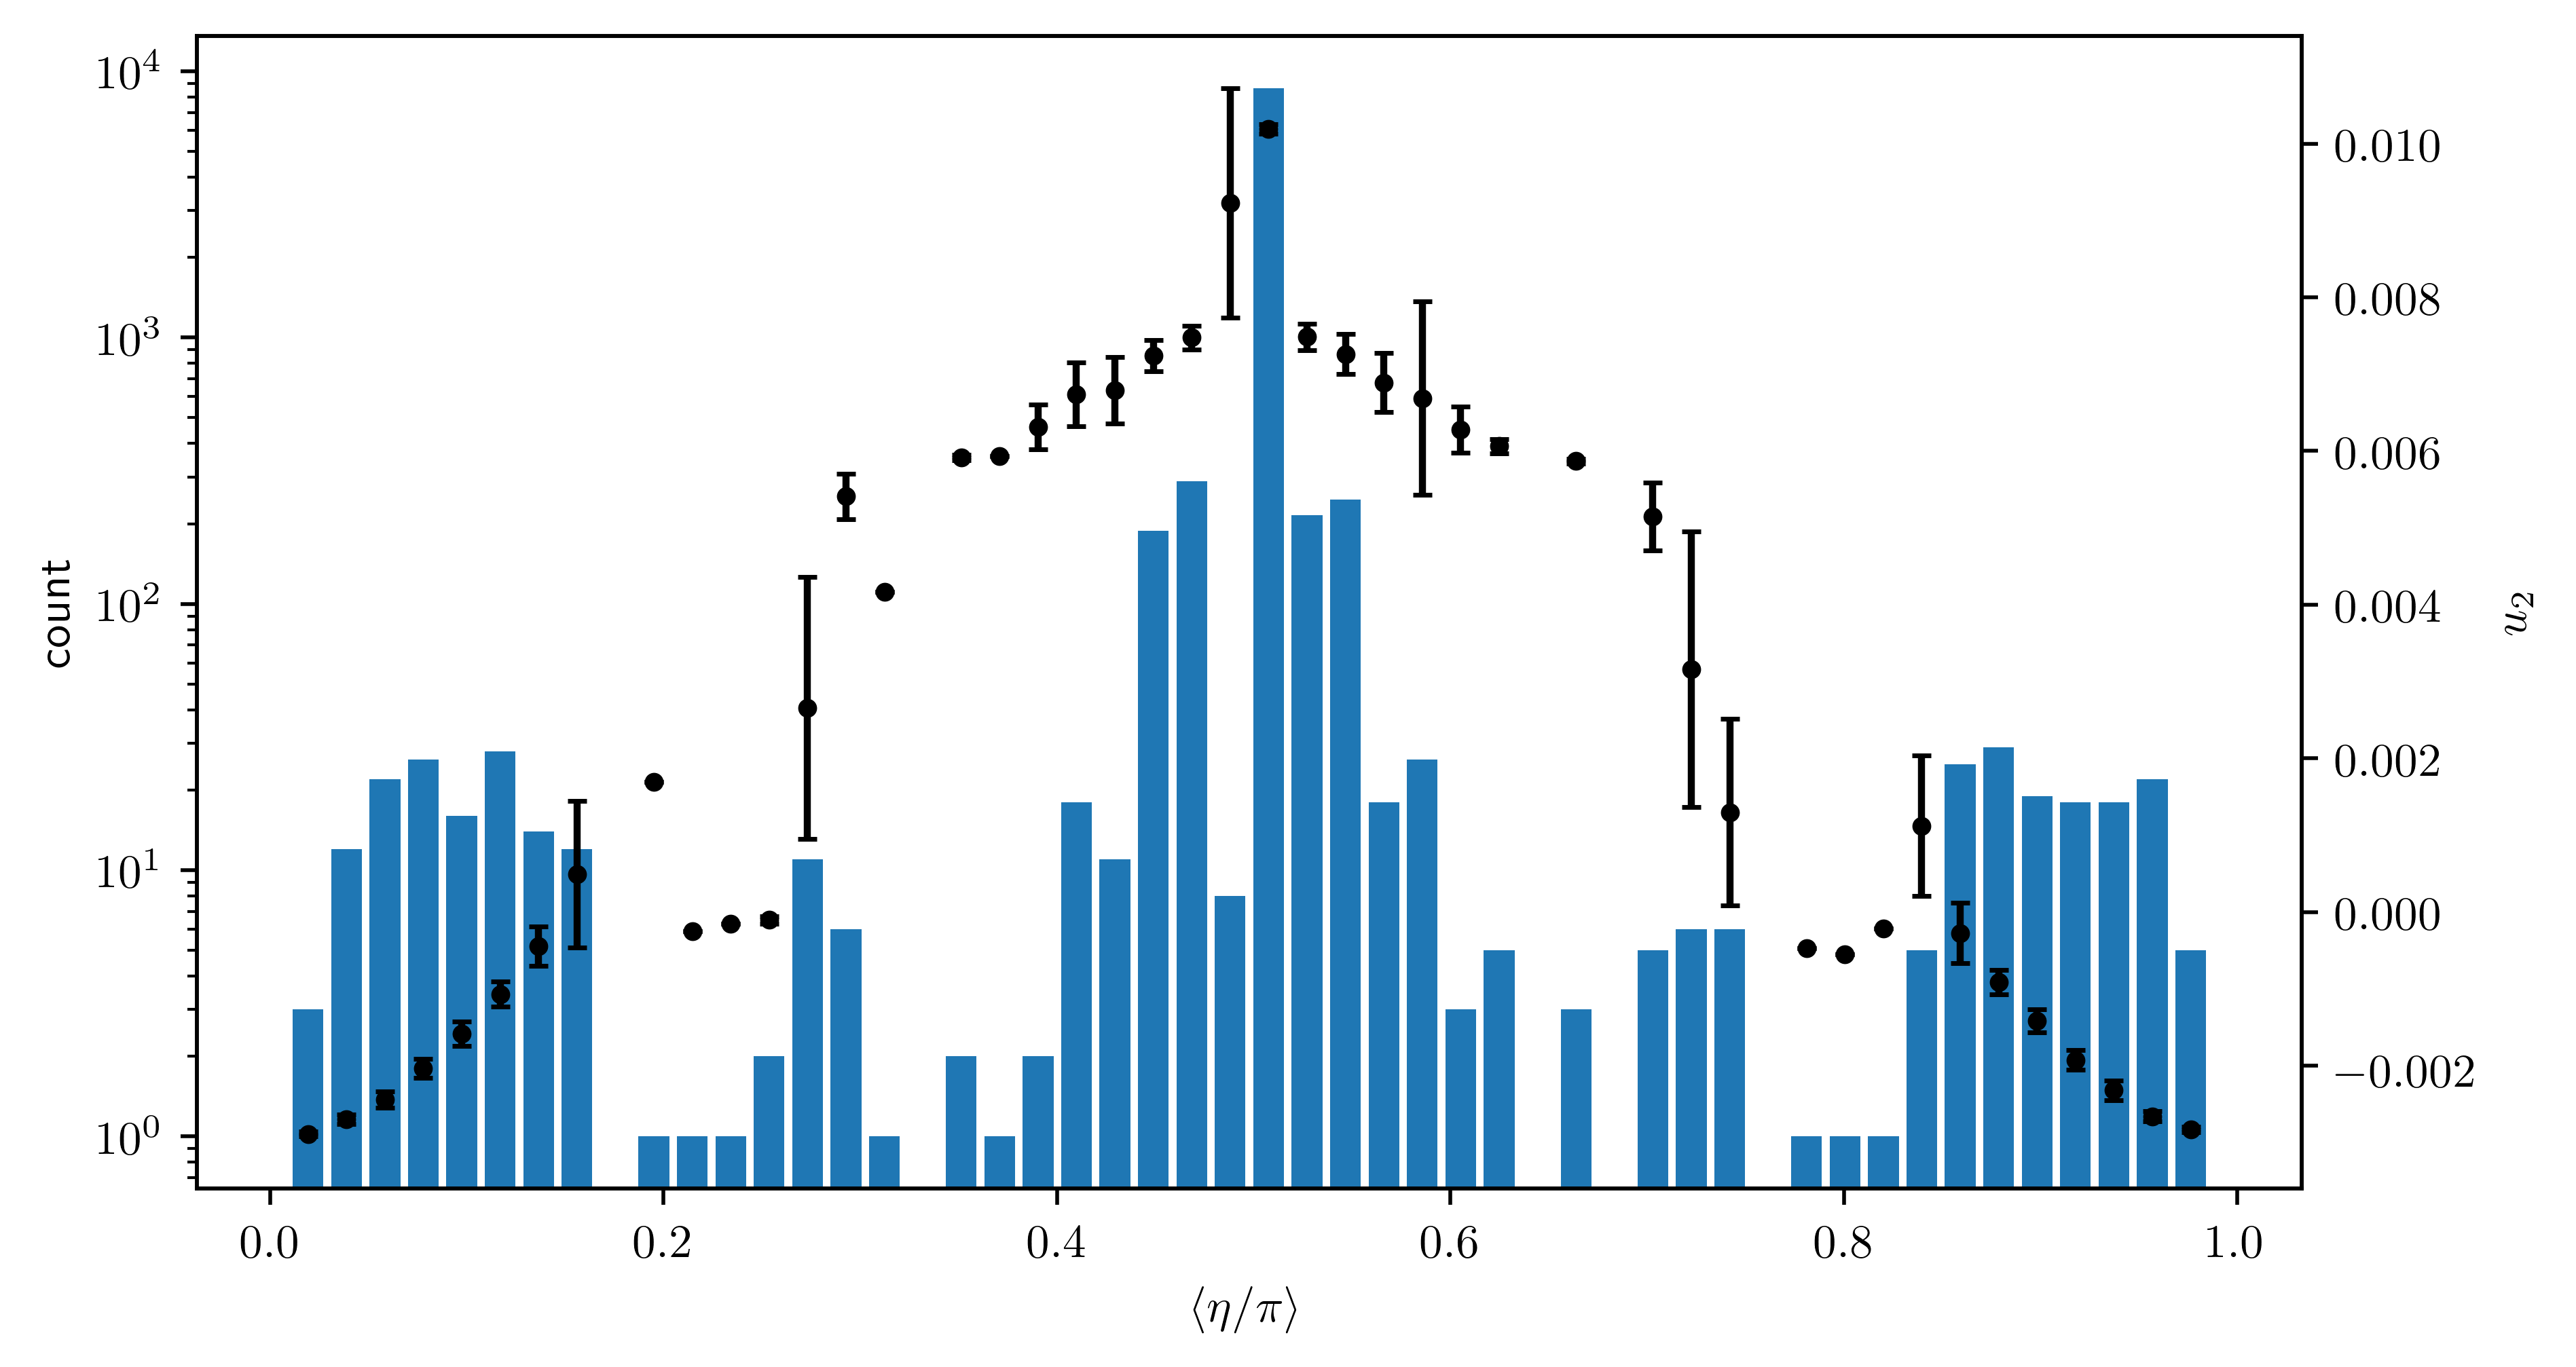

In [16]:
n_hist = 50
figsize = np.array((16, 9)) * 0.5
dpi = 500

teta = np.array([i0[0] / np.pi for i0 in std_eta_list])
hist, bins = np.histogram(teta, n_hist)
case_idx0 = np.digitize(teta, bins)
twidth = 0.8 * (bins[1] - bins[0])
tcenter = (bins[:-1] + bins[1:]) / 2
tx = []
mean_dy = []
std_dy = []
for i0 in range(n_hist):
    tidx = np.isclose(case_idx0, i0+1)
    if np.any(tidx):
        mean_dy.append(np.mean(dy_list[tidx]))
        std_dy.append(np.std(dy_list[tidx]))
        tx.append(tcenter[i0])
tx = np.array(tx)
mean_dy = np.array(mean_dy)
std_dy = np.array(std_dy)

fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi)
axi.bar(tcenter, hist, align='center', width=twidth)
axi.set_yscale('log')
axi.set_xlabel('$\\langle \\eta / \\pi \\rangle$')
axi.set_ylabel('count')

axi2 = axi.twinx()
axi2.errorbar(tx, mean_dy, yerr=std_dy, fmt='.k', capsize=2)
axi2.set_ylabel('$u_2$')

/home/zhangji/stokes_flow_master/head_Force/do_calculate_table/hlxC01_baseFlow_psi_rada/th1.628_ph3.698_ps5.755_D20200516_T231701.pickle


True

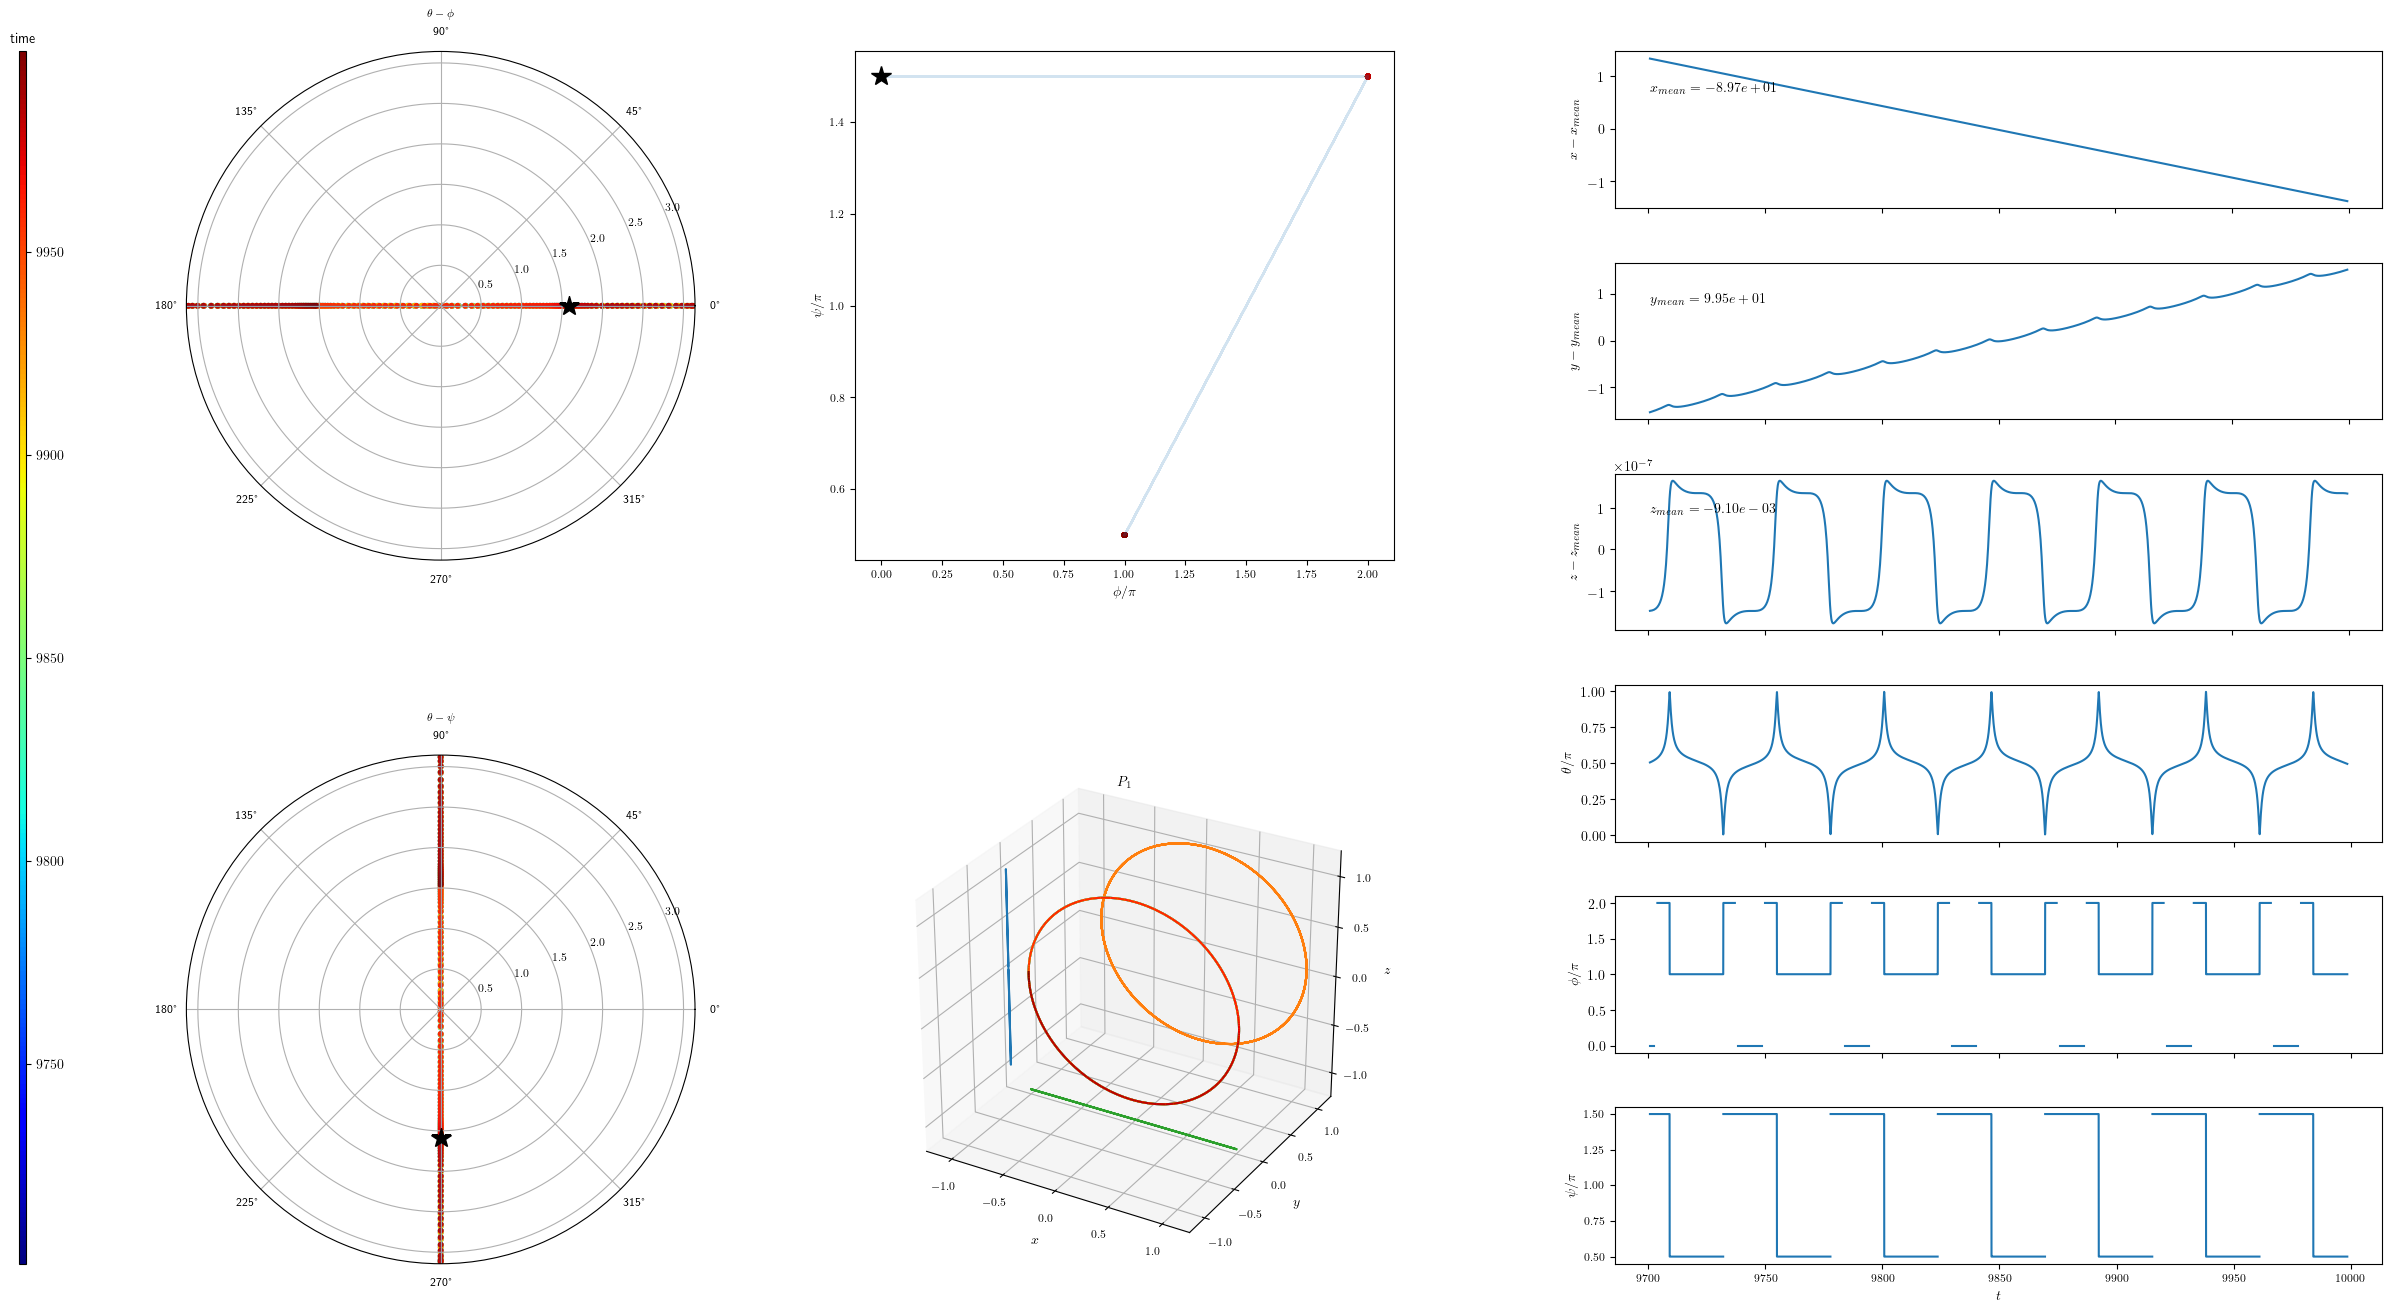

In [19]:
tidx = np.isclose(case_idx0, 26)
tpath = pickle_path_list[tidx][0]
print(tpath)

with open(tpath, 'rb') as handle:
    tpick = pickle.load(handle)
Table_t = tpick['Table_t']
Table_dt = tpick['Table_dt']
Table_X = tpick['Table_X']
Table_P = tpick['Table_P']
Table_P2 = tpick['Table_P2']
Table_theta = tpick['Table_theta']
Table_phi = tpick['Table_phi']
Table_psi = tpick['Table_psi']
Table_eta = tpick['Table_eta']
idx = Table_t > 9700
spf_tb.show_table_result_v2(Table_t[idx], Table_dt[idx], Table_X[idx], Table_P[idx], Table_P2[idx], 
                            Table_theta[idx], Table_phi[idx], Table_psi[idx], Table_eta[idx])

In [18]:
for i0 in range(n_hist):
    tidx = np.isclose(case_idx0, i0+1)
    print(i0+1, dy_list[tidx].shape, np.mean(dy_list[tidx]))

1 (3,) -0.0028896457234133116
2 (12,) -0.0026964083321708576
3 (22,) -0.0024385236659894955
4 (26,) -0.0020320095220277955
5 (16,) -0.001585334077933084
6 (28,) -0.0010684631563286097
7 (14,) -0.00044408708411449073
8 (12,) 0.0004916705533723882
9 (0,) nan
10 (1,) 0.0016952765243009498
11 (1,) -0.0002510378363222337
12 (1,) -0.00015799308803800824
13 (2,) -0.00010186418436400782
14 (11,) 0.0026529616738367994
15 (6,) 0.00540997865140258
16 (1,) 0.0041629311537217
17 (0,) nan
18 (2,) 0.005914310703470753
19 (1,) 0.005930780749804573
20 (2,) 0.006314210614004638
21 (18,) 0.006735078944554571
22 (11,) 0.006789330635884241
23 (188,) 0.007240254764751568
24 (289,) 0.007476129174329125
25 (8,) 0.009228832786460976
26 (8647,) 0.01019043270370712
27 (215,) 0.0074846626242025625
28 (247,) 0.007262367220270036
29 (18,) 0.006888688549727038
30 (26,) 0.0066882201438400405
31 (3,) 0.00627763924761172
32 (5,) 0.00606384529970651
33 (0,) nan
34 (3,) 0.005867989133122979
35 (0,) nan
36 (5,) 0.00514586

/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


/home/zhangji/stokes_flow_master/head_Force/do_calculate_table/hlxC01_baseFlow_psi_rada/th1.596_ph1.564_ps0.816_D20200517_T011423.pickle
trange_geo= 2.1982433294207175
trange_trj= 1.319347863973718


/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes

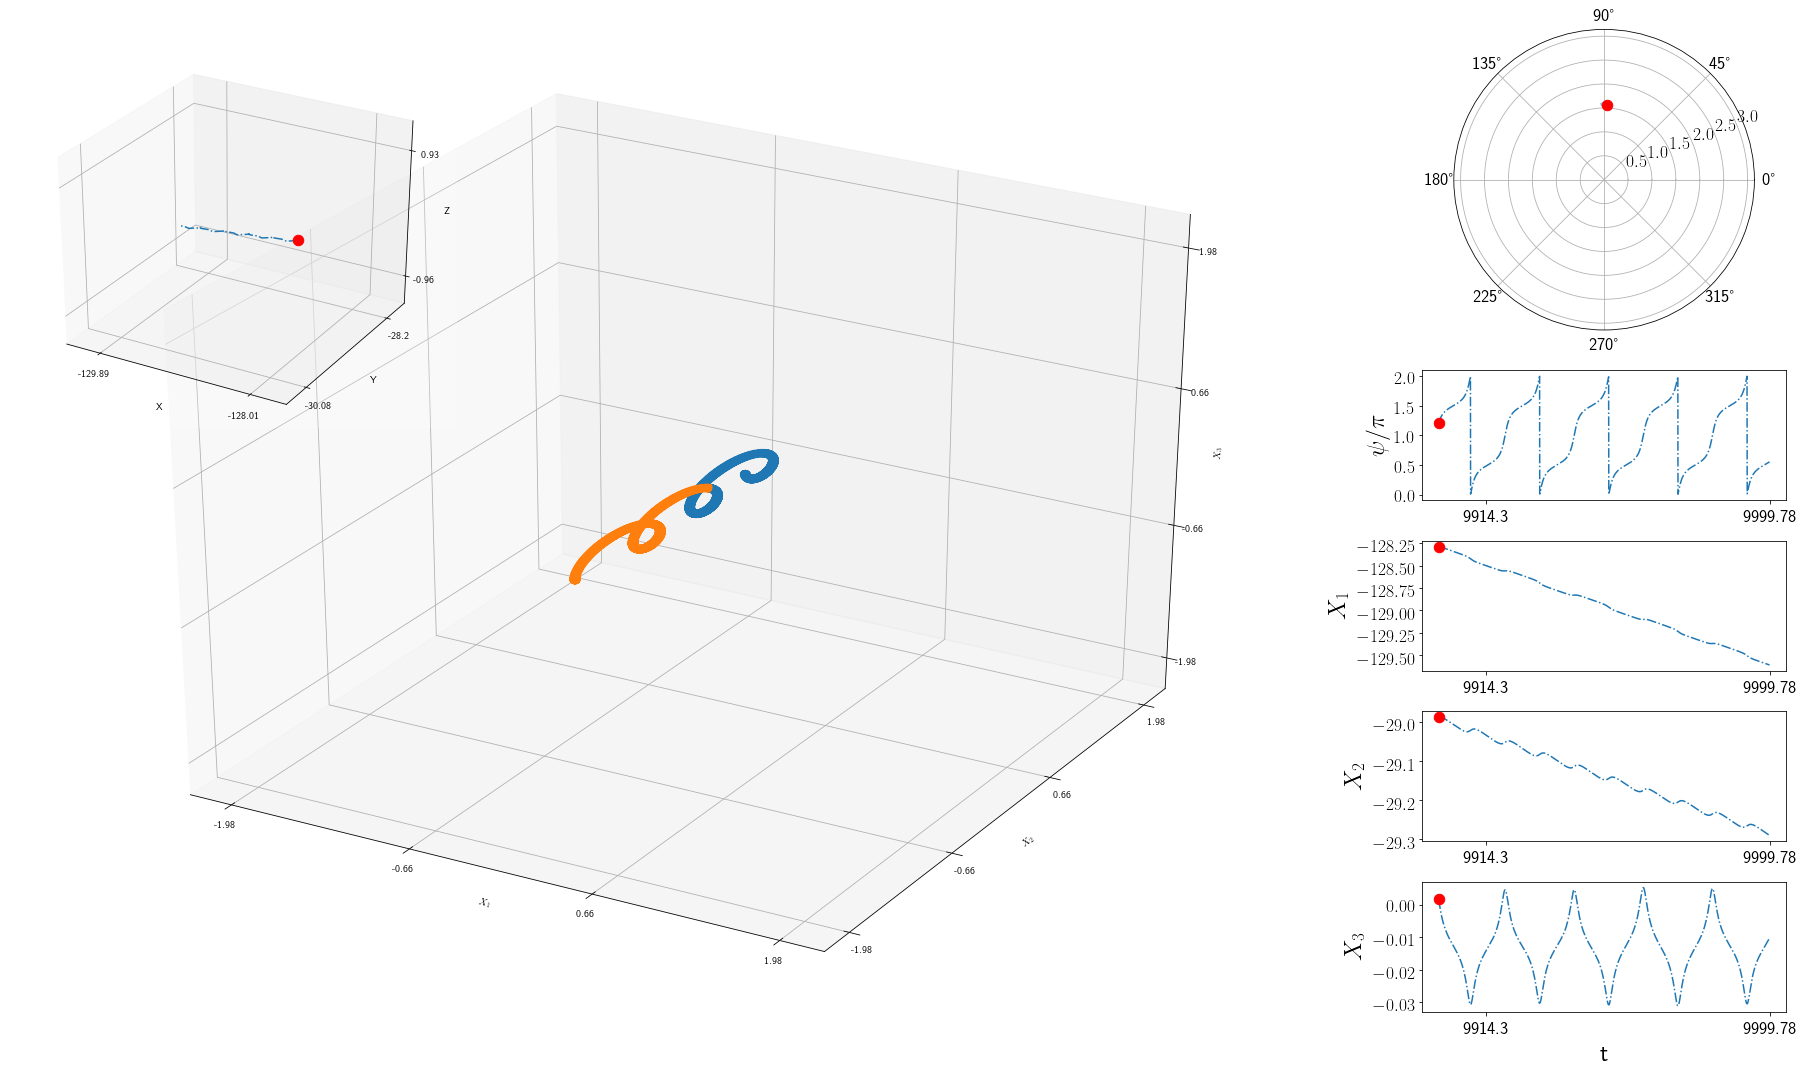

In [28]:
tidx = np.isclose(case_idx0, 1)
tpath = pickle_path_list[tidx][0]
print(tpath)
with open(tpath, 'rb') as handle:
    tpick = pickle.load(handle)
Table_t = tpick['Table_t']
Table_dt = tpick['Table_dt']
Table_X = tpick['Table_X']
Table_P = tpick['Table_P']
Table_P2 = tpick['Table_P2']
Table_theta = tpick['Table_theta']
Table_phi = tpick['Table_phi']
Table_psi = tpick['Table_psi']
Table_eta = tpick['Table_eta']
table_path = os.path.join('/home/zhangji/stokes_flow_master/src', 
                          '%s.pickle' % tpick['problem_kwargs']['table_name'])
with open(table_path, 'rb') as handle:
    table_path = pickle.load(handle)
problem_kwargs = table_path['problem_kwargs']

tidx = Table_t > 9900
anim = spf_tb.make_table_video_geo(Table_t[tidx], Table_X[tidx], Table_P[tidx], Table_P2[tidx],
                                   Table_theta[tidx], Table_phi[tidx], Table_psi[tidx], Table_eta[tidx],
                                   zm_fct=1, stp=1, interval=20, trange_geo=None, trange_trj=None, 
                                   create_obj_at_fun=get_tail_nodes_split_at, resampling_fct=5, 
                                   **problem_kwargs)
anim
# tname = '%s_th%5.3f_ph%5.3f_ps%5.3f.mp4' % (table_name, t_theta, t_phi, t_psi)
# anim.save(tname, writer='ffmpeg', fps=15)
# print(tname, datetime.now())

In [30]:
tname = 'hlx_negx2.mp4'
anim.save(tname, writer='ffmpeg', fps=30)
print(tname, datetime.now())

NameError: name 'datetime' is not defined